In [168]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
cardioData = pd.read_csv('test.csv').drop('age', axis=1)
#cardioData = pd.read_csv('cardio.csv').drop('id', axis=1)

cardioData.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year,cardio_bool
0,1,158,65.0,140,70,2,1,0,0,1,1,26.037494,56,Y
1,1,160,57.0,110,70,1,1,0,0,0,0,22.265625,54,N
2,2,167,75.0,140,80,1,1,0,0,1,1,26.892323,58,Y
3,2,170,58.0,140,90,1,1,0,0,1,1,20.069204,60,Y
4,1,164,65.0,120,80,1,1,0,0,1,0,24.167162,64,N


In [169]:
cardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       500 non-null    int64  
 1   height       500 non-null    int64  
 2   weight       500 non-null    float64
 3   ap_hi        500 non-null    int64  
 4   ap_lo        500 non-null    int64  
 5   cholesterol  500 non-null    int64  
 6   gluc         500 non-null    int64  
 7   smoke        500 non-null    int64  
 8   alco         500 non-null    int64  
 9   active       500 non-null    int64  
 10  cardio       500 non-null    int64  
 11  BMI          500 non-null    float64
 12  year         500 non-null    int64  
 13  cardio_bool  500 non-null    object 
dtypes: float64(2), int64(11), object(1)
memory usage: 54.8+ KB


In [170]:
cardioData.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,year
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.0000,500.000000,500.000000
mean,1.368000,164.888000,73.505000,126.976000,81.83400,1.350000,1.220000,0.066000,0.046000,0.77600,0.5200,27.086237,53.986000
std,0.482744,6.133735,10.750098,13.795218,7.24565,0.669624,0.572937,0.248531,0.209695,0.41734,0.5001,4.107900,6.610689
min,1.000000,152.000000,55.000000,100.000000,70.00000,1.000000,1.000000,0.000000,0.000000,0.00000,0.0000,19.607157,39.000000
25%,1.000000,160.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.00000,0.0000,23.875353,50.000000
50%,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.00000,1.0000,26.331590,55.000000
75%,2.000000,170.000000,80.000000,140.000000,90.00000,1.000000,1.000000,0.000000,0.000000,1.00000,1.0000,29.593301,59.000000
max,2.000000,178.000000,100.000000,160.000000,100.00000,3.000000,3.000000,1.000000,1.000000,1.00000,1.0000,39.657106,65.000000


C:\Users\86150\AppData\Local\Temp\ipykernel_8340\3843711854.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(cardioData.corr(), vmin = -1, vmax = 1,  linewidths = 1,


<AxesSubplot: >

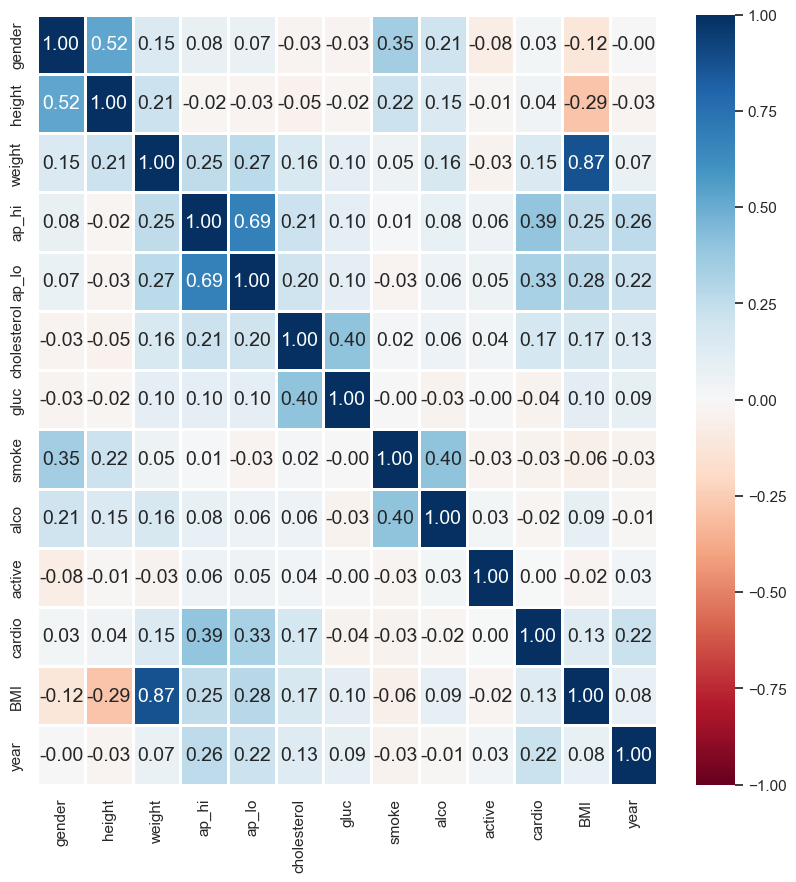

In [171]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(cardioData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

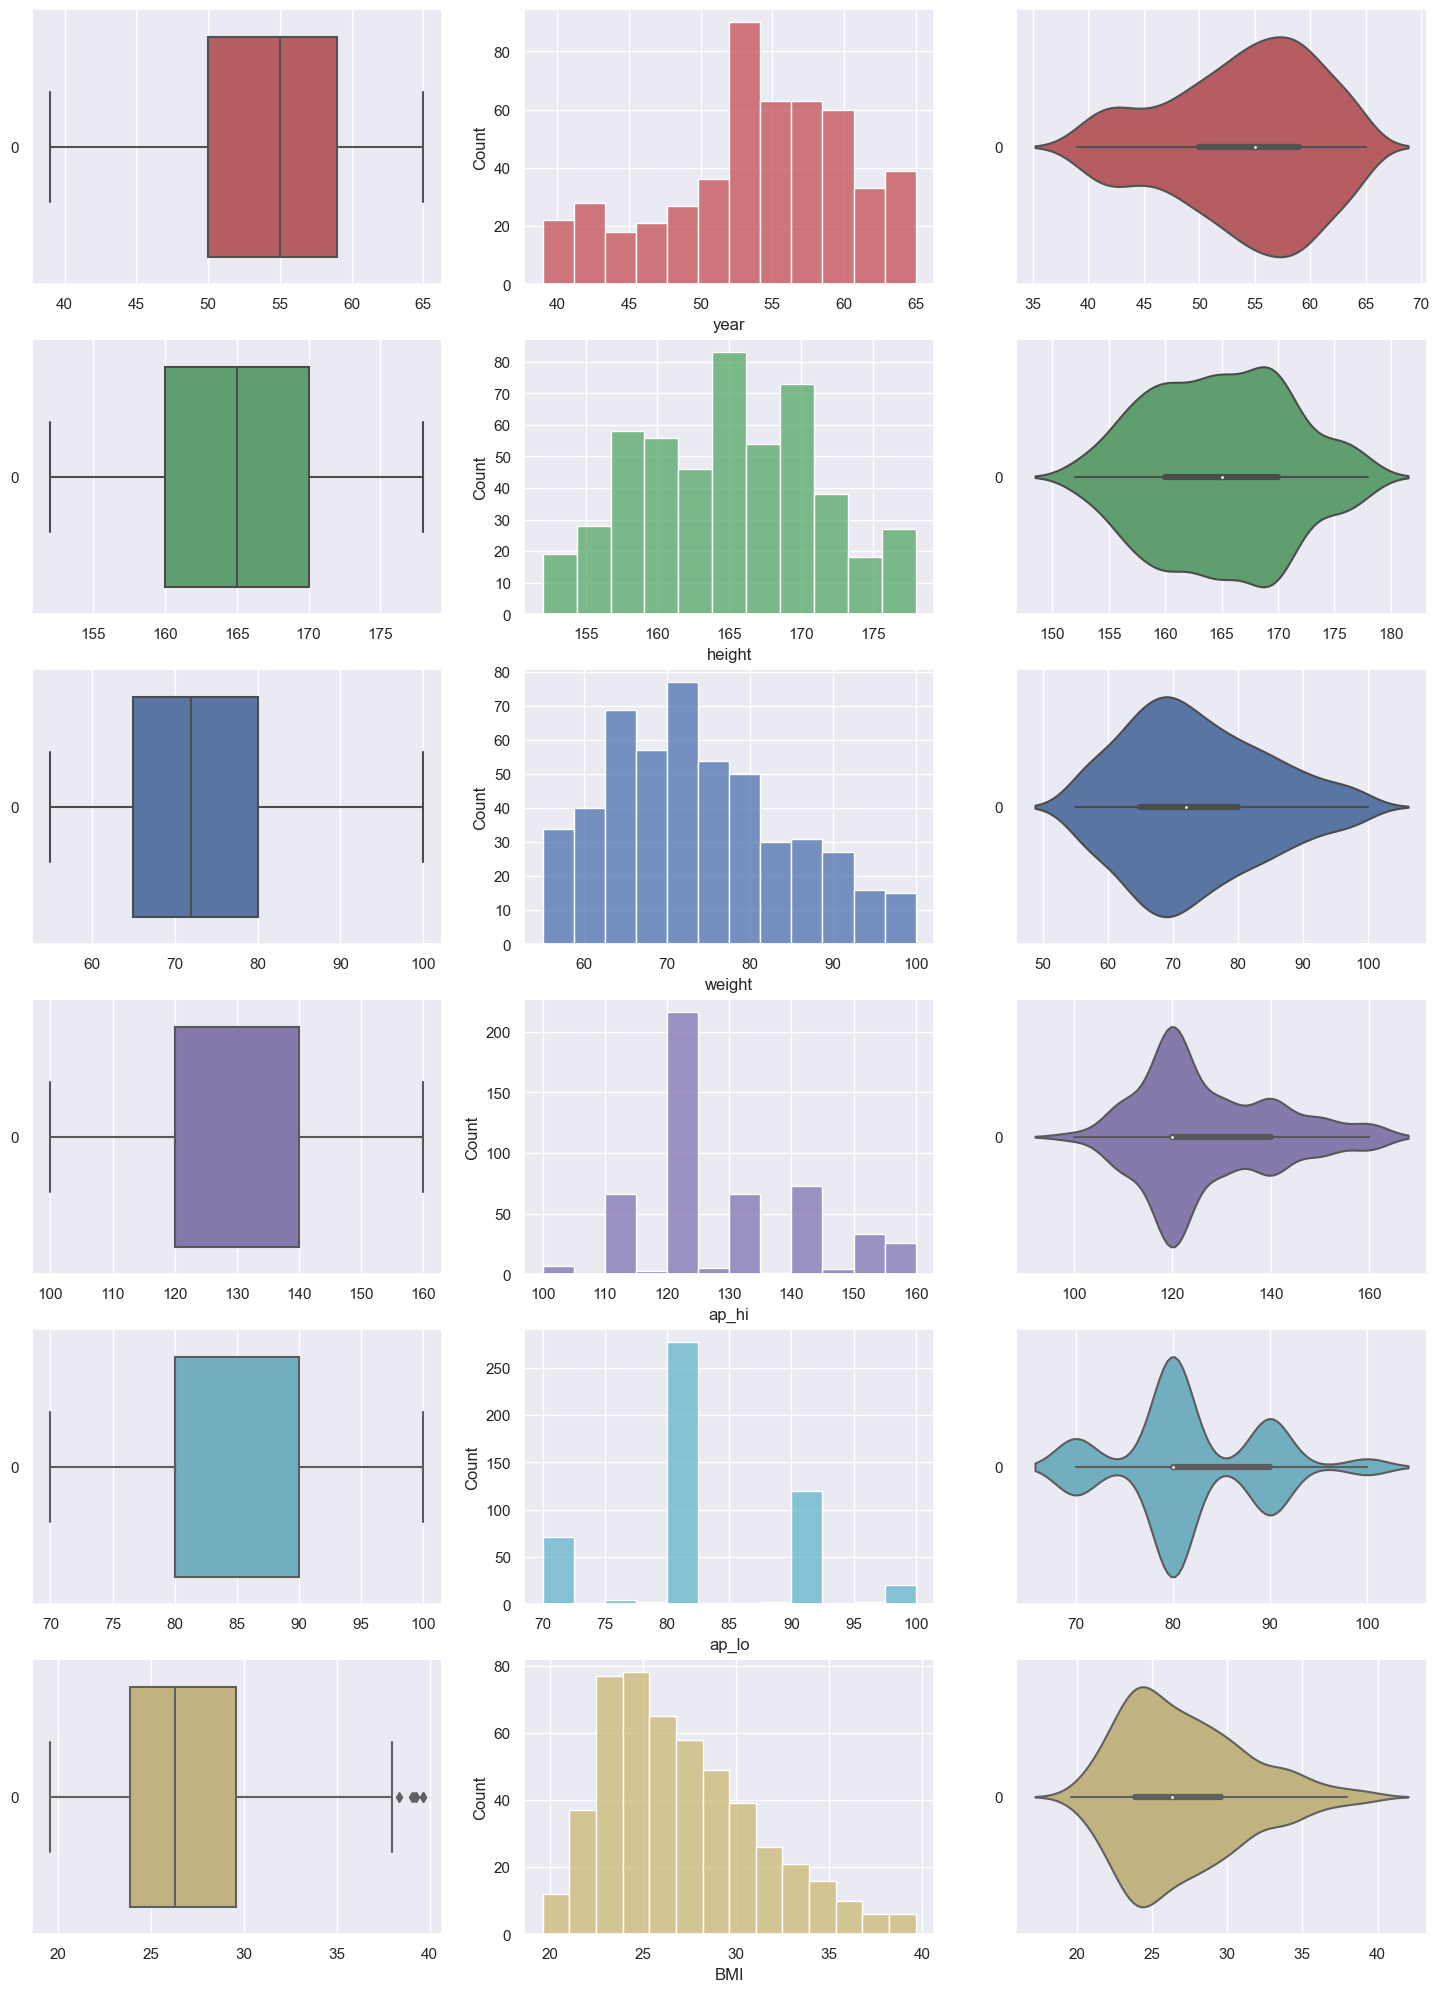

In [176]:
cardioNumData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']])

f, axes = plt.subplots(6, 3, figsize=(18, 25))
colors = ["r", "g", "b", "m", "c" , "y"]

count = 0
for var in cardioNumData:
    sb.boxplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=cardioNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=cardioNumData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

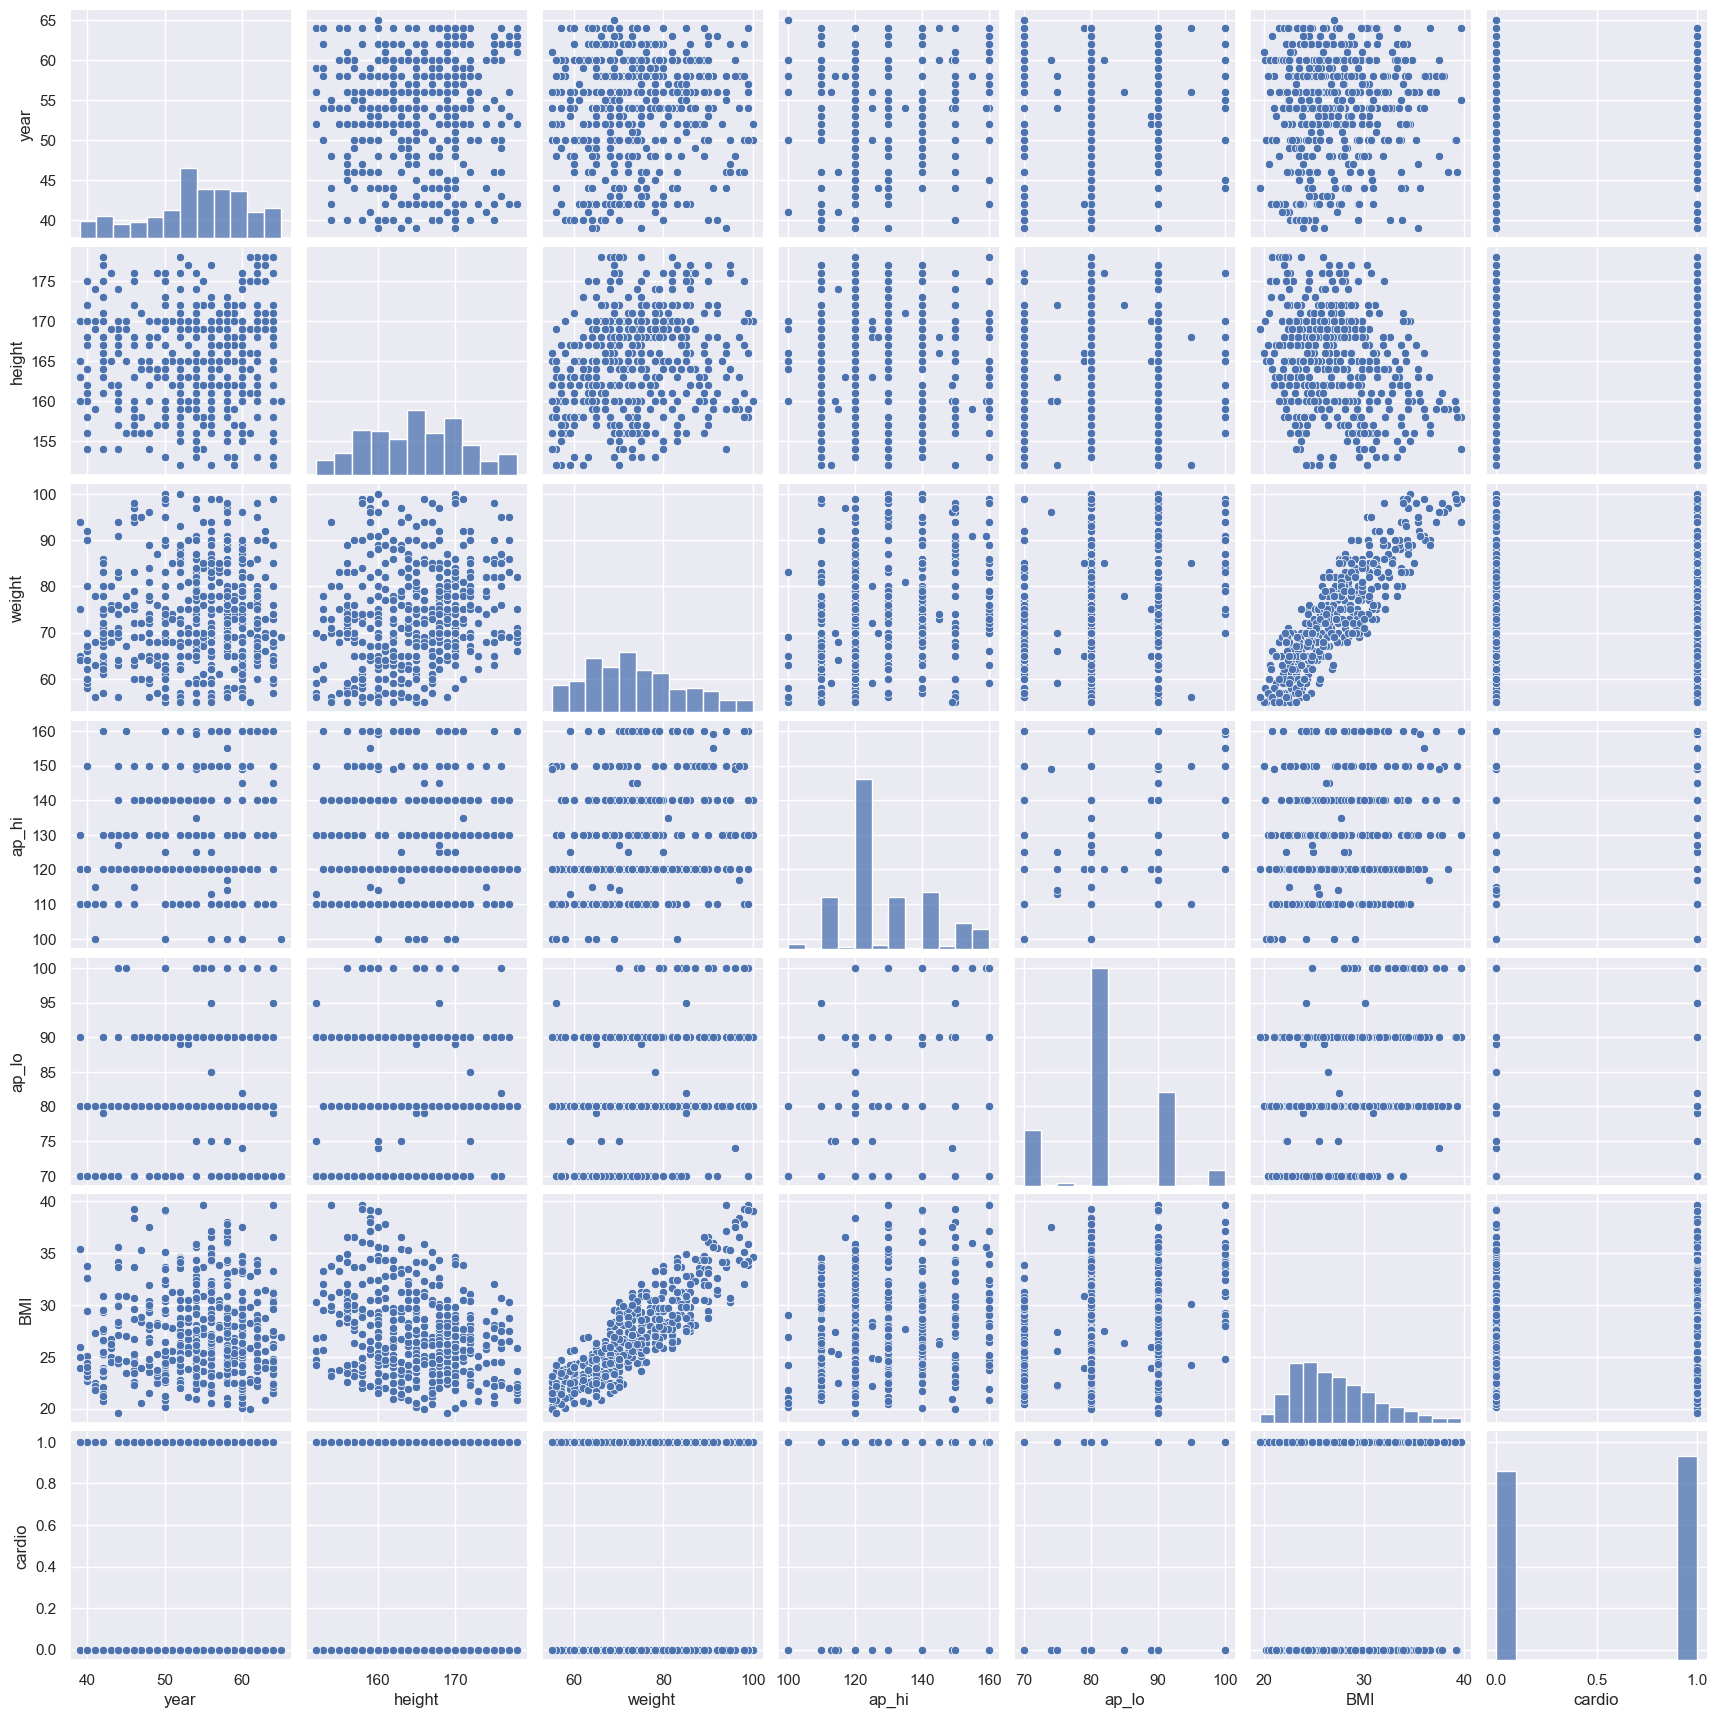

In [173]:
numericData = pd.DataFrame(cardioData[['year', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'cardio']])
sb.pairplot(data = numericData)

<AxesSubplot: >

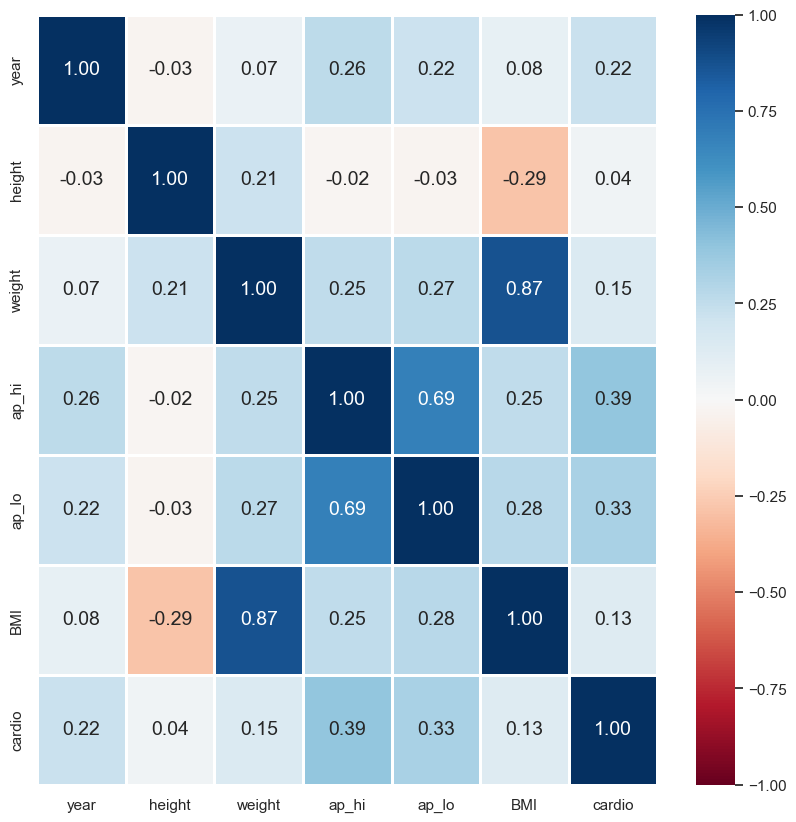

In [174]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(numericData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

<AxesSubplot: xlabel='year', ylabel='cardio_bool'>

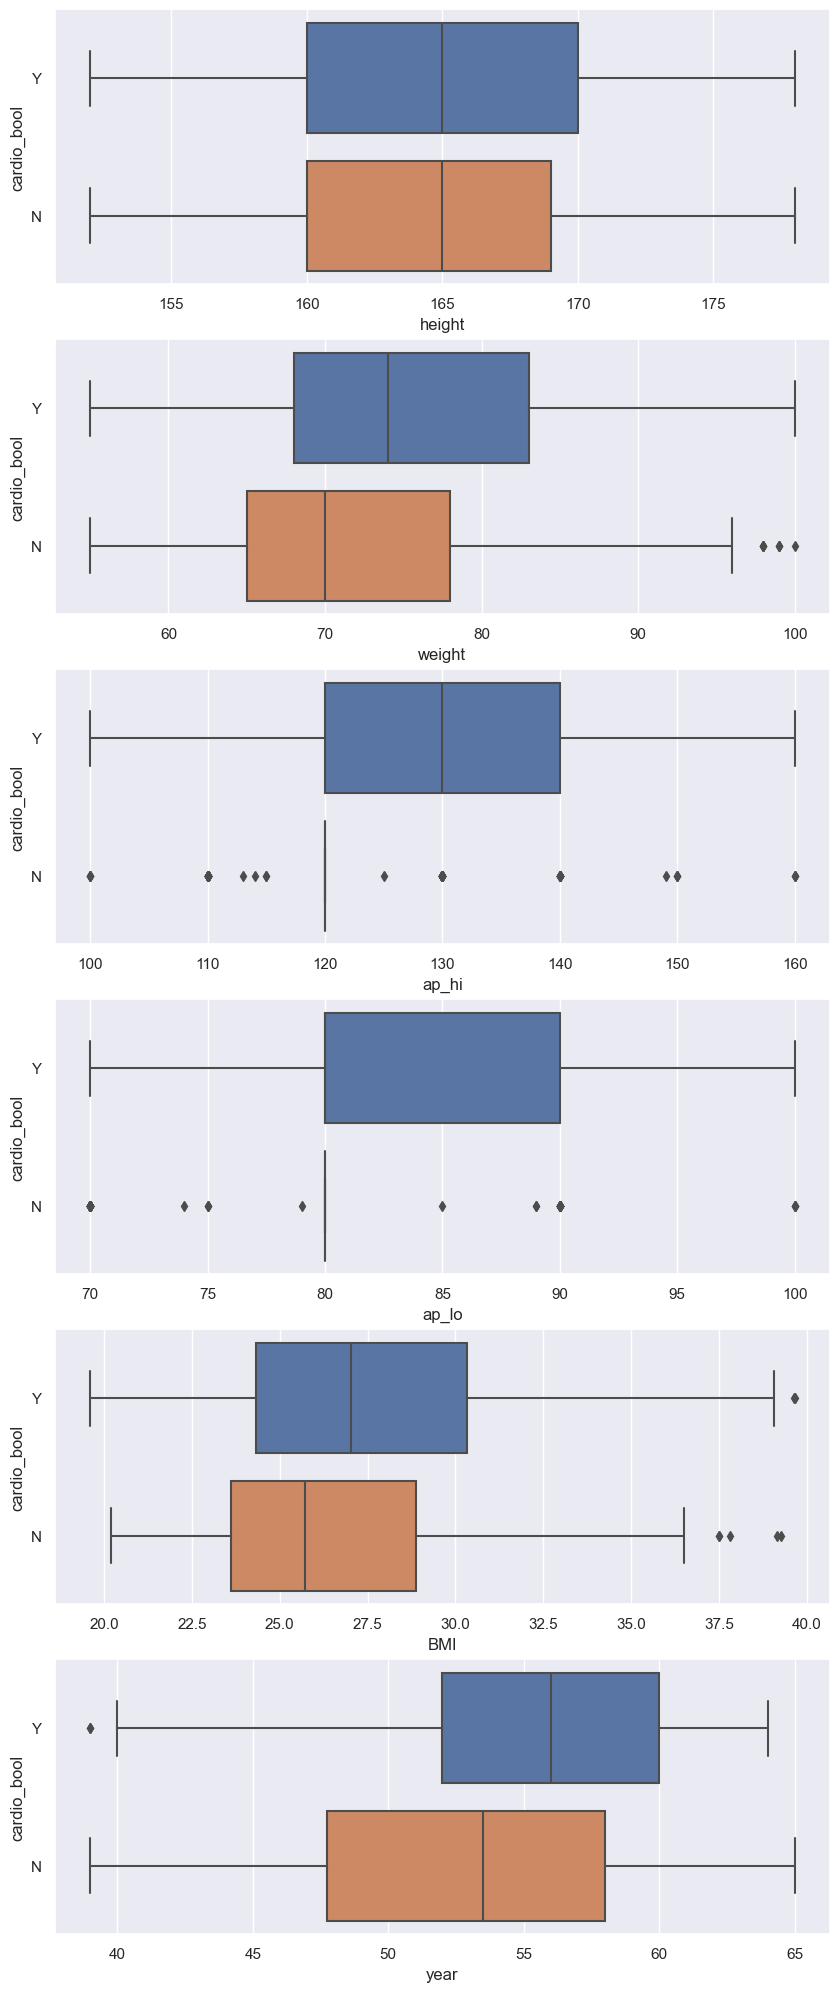

In [175]:
#gender height weight ap_hi ap_lo cholesterol gluc smoke alco active cardio BMI year

f, axes = plt.subplots(6, 1, figsize=(10,25))
sb.boxplot(x = 'height', y = 'cardio_bool', data = cardioData, ax = axes[0])
sb.boxplot(x = 'weight', y = 'cardio_bool', data = cardioData, ax = axes[1])
sb.boxplot(x = 'ap_hi', y = 'cardio_bool', data=cardioData, ax=axes[2])
sb.boxplot(x = 'ap_lo', y = 'cardio_bool', data = cardioData, ax = axes[3])
sb.boxplot(x = 'BMI', y = 'cardio_bool', data = cardioData, ax = axes[4])
sb.boxplot(x = 'year', y = 'cardio_bool', data = cardioData, ax = axes[5])